Q1. How can you create a Bokeh plot using Python code?

In [ ]:
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()

In [ ]:
from bokeh.models import Title
from bokeh.plotting import figure,output_file,show

In [ ]:
x=[2,3,4,5,6]
y=[3,4,5,6,7]

output_file='line.html'

p=figure(title="line plot")
p.scatter(x,y,fill_color='red',size=10)
show(p)

Q2. What are glyphs in Bokeh, and how can you add them to a Bokeh plot? Explain with an example.

Glyphs in Bokeh are the visual shapes or markers used to represent data points in a plot. They allow you to visually encode the data in various ways, such as circles, squares, triangles, lines, and more.

In [ ]:
import random
from bokeh.plotting import figure, show

x = [random.randint(0, 100) for _ in range(50)]
y = [random.randint(0, 100) for _ in range(50)]

p = figure()
p.circle(x, y, size=10, color="blue")   # Add circles as glyphs
p.title.text = "Scatter Plot with Circles"
p.xaxis.axis_label = "X-axis"
p.yaxis.axis_label = "Y-axis"
show(p)


Q3. How can you customize the appearance of a Bokeh plot, including the axes, title, and legend?

In [ ]:
from bokeh.plotting import figure, show

x=[2,3,4,5,6]
y=[3,4,5,6,7]

p = figure(title="Customized Bokeh Plot", x_axis_label="X-axis", y_axis_label="Y-axis")
p.title.text_font_size = "16pt"
p.title.text_color = "blue"
p.xaxis.axis_label_text_font_style = "italic"
p.yaxis.axis_label_text_font_style = "italic"
p.xaxis.axis_label_text_color = "red"
p.yaxis.axis_label_text_color = "green"
p.legend.title = "Legend Title"
p.legend.location = "top_right"
p.scatter(x,y,size=10)
show(p)


Q4. What is a Bokeh server, and how can you use it to create interactive plots that can be updated in
real time?

A Bokeh server is a Python server that allows to create and deploy interactive web applications and dashboards with Bokeh plots. It provides the capability to update and synchronize plots in real time based on user interactions or external data changes.

By using the Bokeh server, we can create dynamic and interactive plots that respond to user input, such as selections, mouse movements, or button clicks. It enables the creation of live, streaming, or continuously updating visualizations that can reflect real-time data changes.

In [7]:
import random
from bokeh.driving import count
from bokeh.models import ColumnDataSource
from bokeh.plotting import curdoc , figure

In [8]:
update_interval =100
roll_over=100

source=ColumnDataSource({'x':[] , 'y':[]})

@count()
def update(x):
  y=random.random()
  source.stream({'x':[x] , 'y':[y]} , rollover=roll_over)

plot=figure()
plot.line('x','y', source=source)
plot.xaxis.axis_label='x'
plot.yaxis.axis_label='y'

doc=curdoc()
doc.add_root(plot)
doc.add_periodic_callback(update, update_interval)
show(plot)

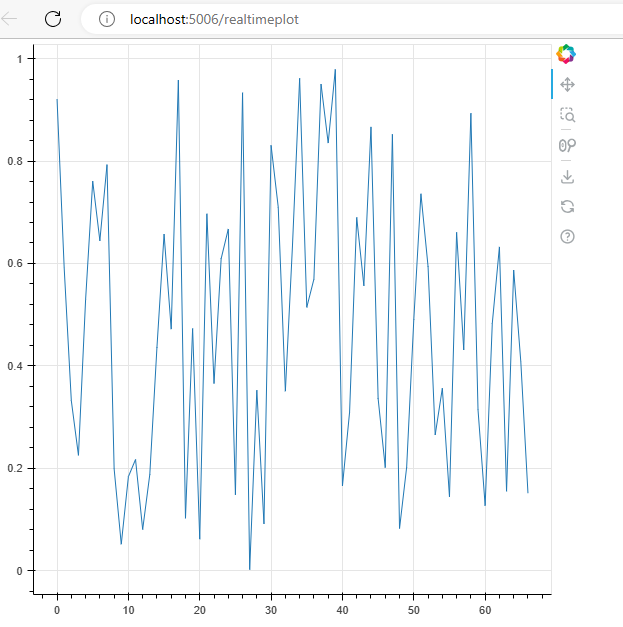

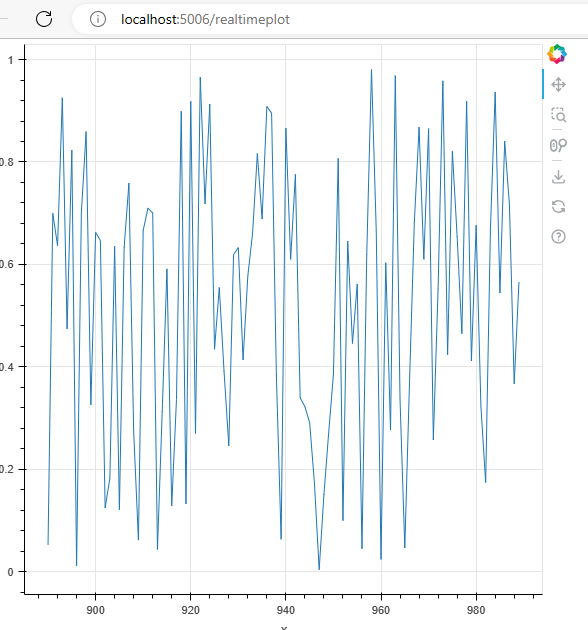

Q5. How can you embed a Bokeh plot into a web page or dashboard using Flask or Django?

In [ ]:
# app.py

import random

from flask import Flask, render_template
from bokeh.embed import components
from bokeh.plotting import figure

app = Flask(__name__)

@app.route('/')
def homepage():

    p1 = figure(height=350, sizing_mode="stretch_width")
    p1.circle(
        [i for i in range(10)],
        [random.randint(1, 50) for j in range(10)],
        size=20,
        color="navy",
        alpha=0.5
    )

    language = ['Python', 'JavaScript', 'C++', 'C#', 'Java', 'Golang']
    popularity = [85, 91, 63, 58, 80, 77]

    p2 = figure(
        x_range=language,
        height=350,
        title="Popularity",
    )
    p2.vbar(x=language, top=popularity, width=0.5)
    p2.xgrid.grid_line_color = None
    p2.y_range.start = 0

    p3 = figure(height=350, sizing_mode="stretch_width")
    p3.line(
        [i for i in range(10)],
        [random.randint(1, 50) for j in range(10)],
        line_width=2,
        color="olive",
        alpha=0.5
    )

    script1, div1 = components(p1)
    script2, div2 = components(p2)
    script3, div3 = components(p3)

    return render_template(
        template_name_or_list='index.html',
        script=[script1, script2, script3],
        div=[div1, div2, div3],
    )


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=3000)

# index.html

<!DOCTYPE html>
<html lang="en">

<head>
	<meta charset="utf-8">
	<meta name="viewport" content="width=device-width, initial-scale=1">

	<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css" rel="stylesheet"
		integrity="sha384-Zenh87qX5JnK2Jl0vWa8Ck2rdkQ2Bzep5IDxbcnCeuOxjzrPF/et3URy9Bv1WTRi" crossorigin="anonymous">

	<!-- <link href="http://cdn.bokeh.org/bokeh/release/bokeh-3.0.1.min.css" rel="stylesheet" type="text/css"> -->
	<script src="https://cdnjs.cloudflare.com/ajax/libs/bokeh/3.0.1/bokeh.min.js"
		integrity="sha512-p7EUyPmeDeOwHiu7fIZNboAcQLxei3sWtXoHoShWWiPNUSRng/Xs5JPcaFPRa4dKy9IuHjyIQuLE4caGCwuewA=="
		crossorigin="anonymous" referrerpolicy="no-referrer"></script>

	<title>Bokeh Charts</title>
</head>

<body>

	<div class="container">
		<h1 class="text-center py-4">Responsive Chart with Bokeh, Flask and Python</h1>
		<div class="row mb-5">
			<div class="col-md-6">
				<h4 class="text-center">Scatter Plot</h4>
				{{ div[0] | safe }}
				{{ script[0] | safe }}
			</div>
			<div class="col-md-6">
				<h4 class="text-center">Bar Chart</h4>
				{{ div[1] | safe }}
				{{ script[1] | safe }}
			</div>
		</div>
		<div class="row">
			<div class="col-md-12">
				<h4 class="text-center">Line Chart</h4>
				{{ div[2] | safe }}
				{{ script[2] | safe }}
			</div>
		</div>
	</div>

</body>

</html>


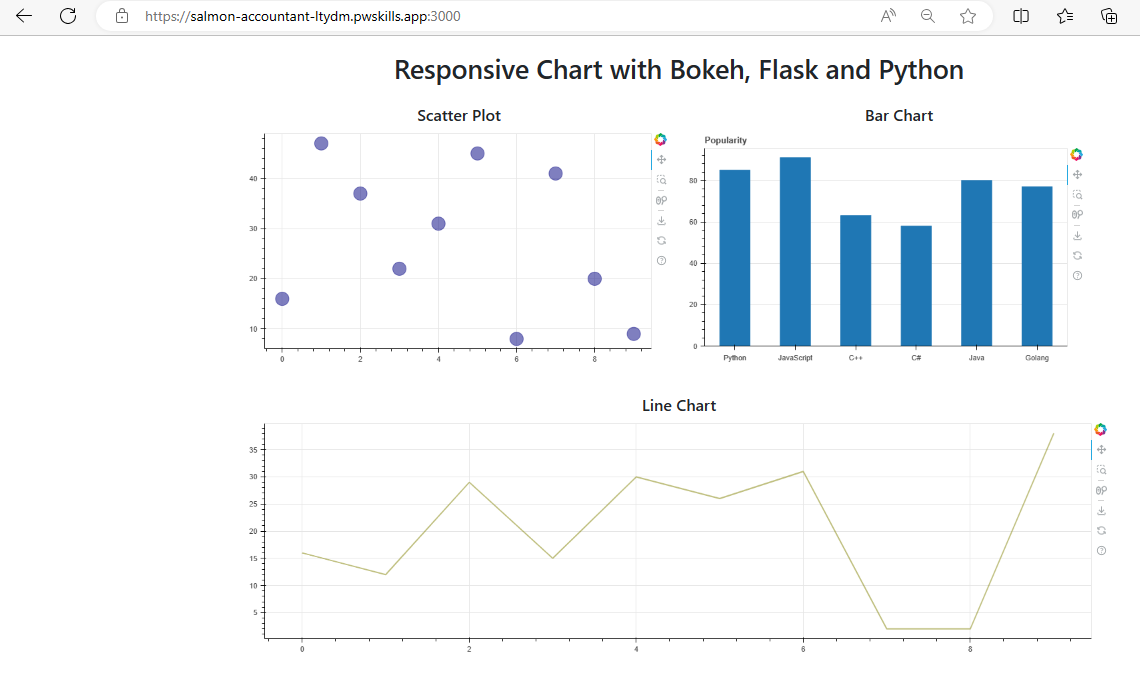